In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [2]:
imagename = 'combine-substracted.J0423-0120.conta2.image.fits'

In [3]:
hdu_list = fits.open(imagename)

In [4]:
hdu_list.info()

Filename: combine-substracted.J0423-0120.conta2.image.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU    1222   (768, 768, 1, 1)   float32   


In [5]:
image_data = hdu_list[0].data

In [6]:
print type(image_data)
print image_data.shape

<type 'numpy.ndarray'>
(1, 1, 768, 768)


In [7]:
image_data[0][0].shape

(768, 768)

In [8]:
img = image_data[0][0]

In [9]:
type(img)

numpy.ndarray

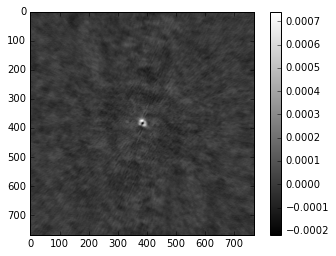

In [10]:
plt.imshow(img, cmap='gray')
plt.colorbar()

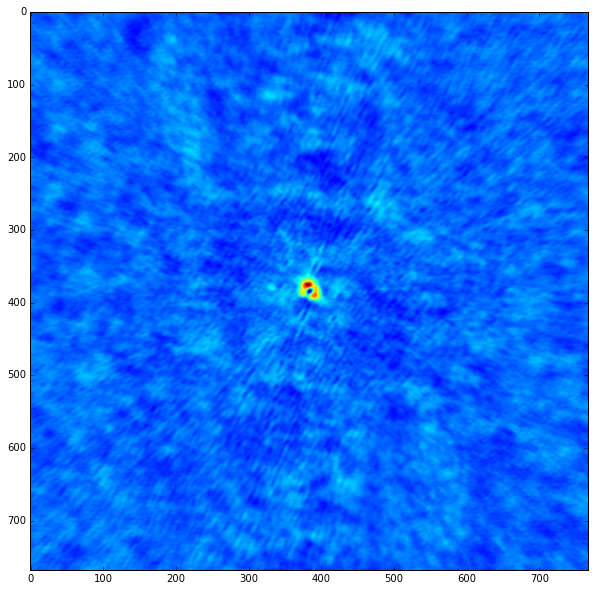

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(img)

# I chose the tick marks based on the histogram above
# cbar = plt.colorbar(ticks=[3e-05,12e-05,3e-03])
# cbar.ax.set_yticklabels([3e-05,12e-05,3e-03])

In [12]:
from wavelet import wt
wt = wt()

In [13]:
result = wt.atrous(img, 6)

##WT--A Trous--Plane: 6
##WT--A Trous--Plane: 5
##WT--A Trous--Plane: 4
##WT--A Trous--Plane: 3
##WT--A Trous--Plane: 2
##WT--A Trous--Plane: 1
##WT--A Trous--Plane: 0


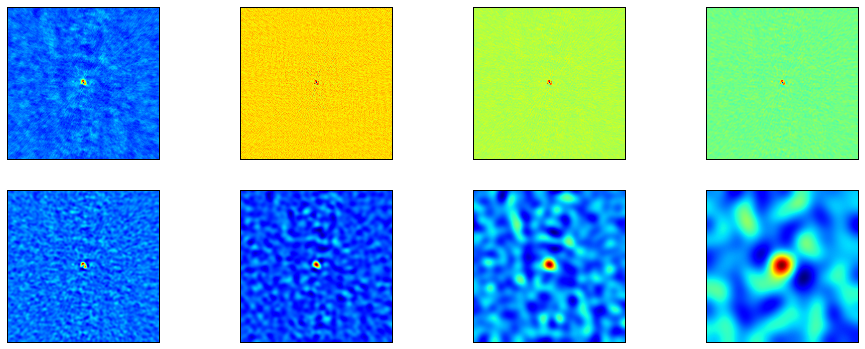

In [14]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(result):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [15]:
filteredplane = wt.filtering(result, threshold=3, mask=(0, 768, 0, 768))
#filteredplane = wt.filtering(result, waveletNoise=True, imageNoise = 3.5E-05)

#WT-- Image Filtering
#WT-- Filtering to be checked
##WT--Plane 6 Sigma = 2.228440e-06
##WT--Pixel filtered : 586446
##WT--Plane 5 Sigma = 5.425158e-06
##WT--Pixel filtered : 586924
##WT--Plane 4 Sigma = 7.530779e-06
##WT--Pixel filtered : 587943
##WT--Plane 3 Sigma = 8.327378e-06
##WT--Pixel filtered : 587865
##WT--Plane 2 Sigma = 7.987768e-06
##WT--Pixel filtered : 587388
##WT--Plane 1 Sigma = 5.804608e-06
##WT--Pixel filtered : 585779


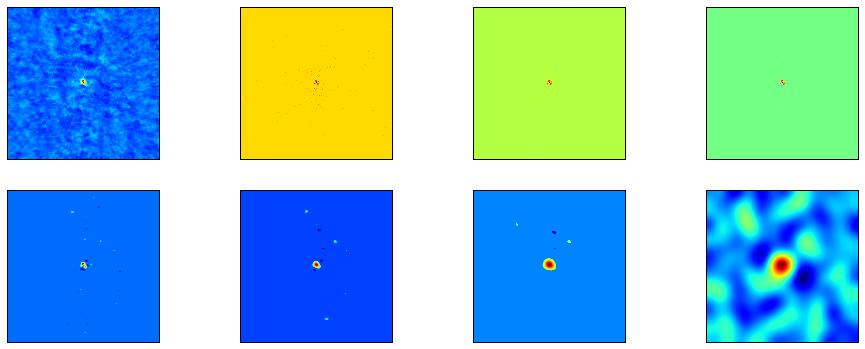

In [16]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(filteredplane):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [17]:
filtered = wt.restore(filteredplane, 0, 6)

##WT--Restore-plane: 0 to 6
##WT--Restore-plane: 0
##WT--Restore-plane: 1
##WT--Restore-plane: 2
##WT--Restore-plane: 3
##WT--Restore-plane: 4
##WT--Restore-plane: 5
##WT--Restore-plane: 6


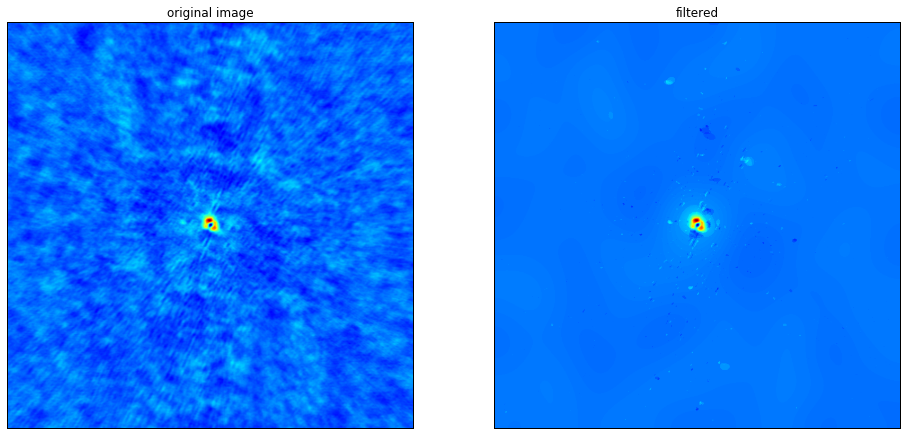

In [18]:
plt.figure(figsize=(16,12))

plt.subplot(121)
plt.imshow(img)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title("filtered")
plt.imshow(filtered)
plt.xticks([]), plt.yticks([])

plt.show()